In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist_extremes

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
NSIDE=64
your_username = "rjassef"
folder_mafoutput = "Mean_Night_Filter_v2"
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(bundleDicts_raw.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [9]:
# check keys
dbRuns = list(resultDbs.keys())
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys)

[(1, 'MeanNightFilterSeparationMetric_u_g'), (2, 'MeanNightFilterSeparationMetric_z_y'), (3, 'MeanNightFilterSeparationMetric_i_z'), (4, 'MeanNightFilterSeparationMetric_r_i'), (5, 'MeanNightFilterSeparationMetric_g_r')]


In [10]:
#Sort the keys.
filters = ["u","g","r","i","z","y"]
sorted_Keys = list()
for k in range(len(filters[:-1])):
    metric_name = "MeanNightFilterSeparationMetric_{0}_{1}".format(filters[k],filters[k+1])
    for Key in Keys:
        if Key[1]==metric_name:
            sorted_Keys.append(Key)
            break
print(sorted_Keys)

[(1, 'MeanNightFilterSeparationMetric_u_g'), (5, 'MeanNightFilterSeparationMetric_g_r'), (4, 'MeanNightFilterSeparationMetric_r_i'), (3, 'MeanNightFilterSeparationMetric_i_z'), (2, 'MeanNightFilterSeparationMetric_z_y')]


In [11]:
#Make sure that the plots folder exists. 
plots_folder = "plots_all_opsims_extremes_{0:d}".format(NSIDE)
if not os.path.exists(plots_folder):
    os.mkdir(plots_folder)

### Make the plots

(1, 'MeanNightFilterSeparationMetric_u_g')
filterdist_indx3_v1.5_10yrs 0.0
baseline_samefilt_v1.5_10yrs 13.727272727272727
(5, 'MeanNightFilterSeparationMetric_g_r')
cadence_drive_gl200v1.7_10yrs 0.06796116504854369
baseline_samefilt_v1.5_10yrs 8.125
(4, 'MeanNightFilterSeparationMetric_r_i')
filterdist_indx6_v1.5_10yrs 1.8666666666666667
ss_heavy_nexp2_v1.6_10yrs 10.484250992063492
(3, 'MeanNightFilterSeparationMetric_i_z')
ss_heavy_v1.6_10yrs 2.6153846153846154
baseline_samefilt_v1.5_10yrs 11.774193548387096
(2, 'MeanNightFilterSeparationMetric_z_y')
filterdist_indx5_v1.5_10yrs 4.079694612046152
twi_neo_pattern1_v1.7_10yrs 17.3046875


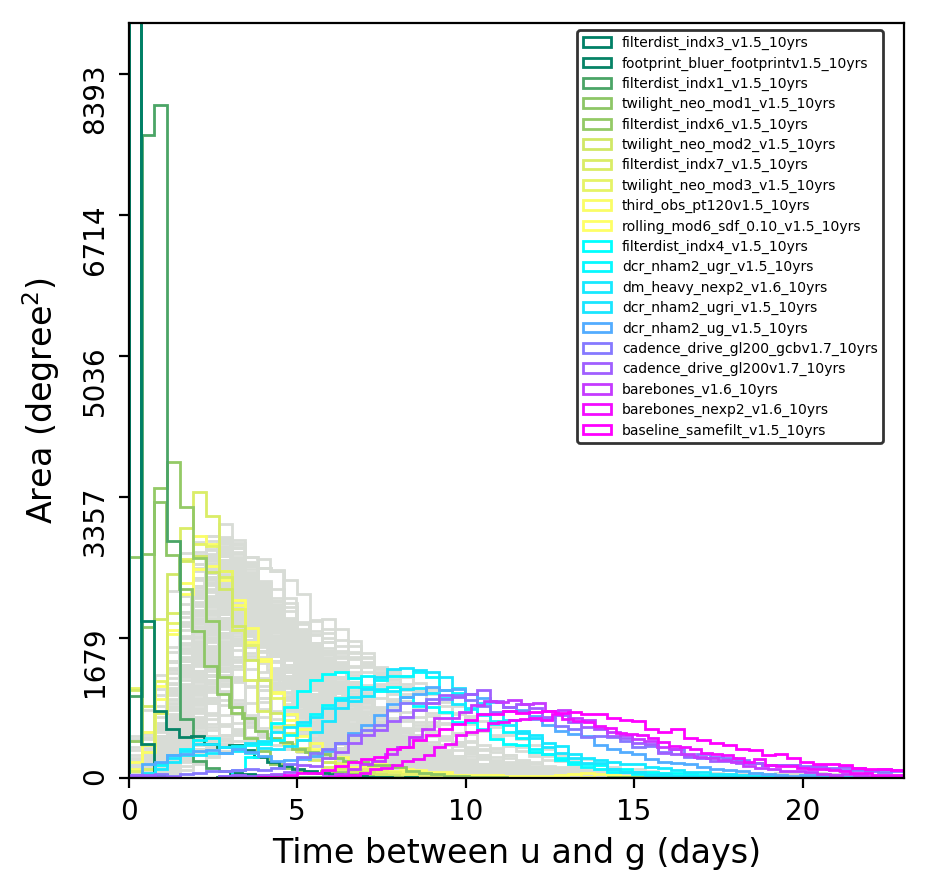

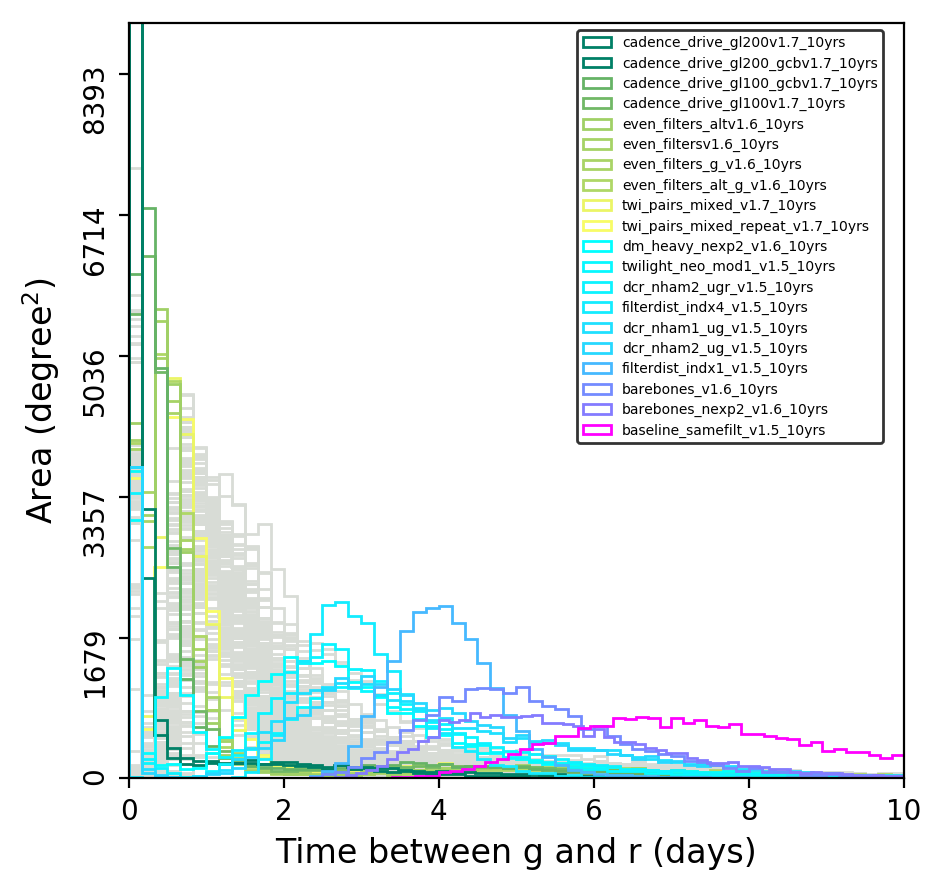

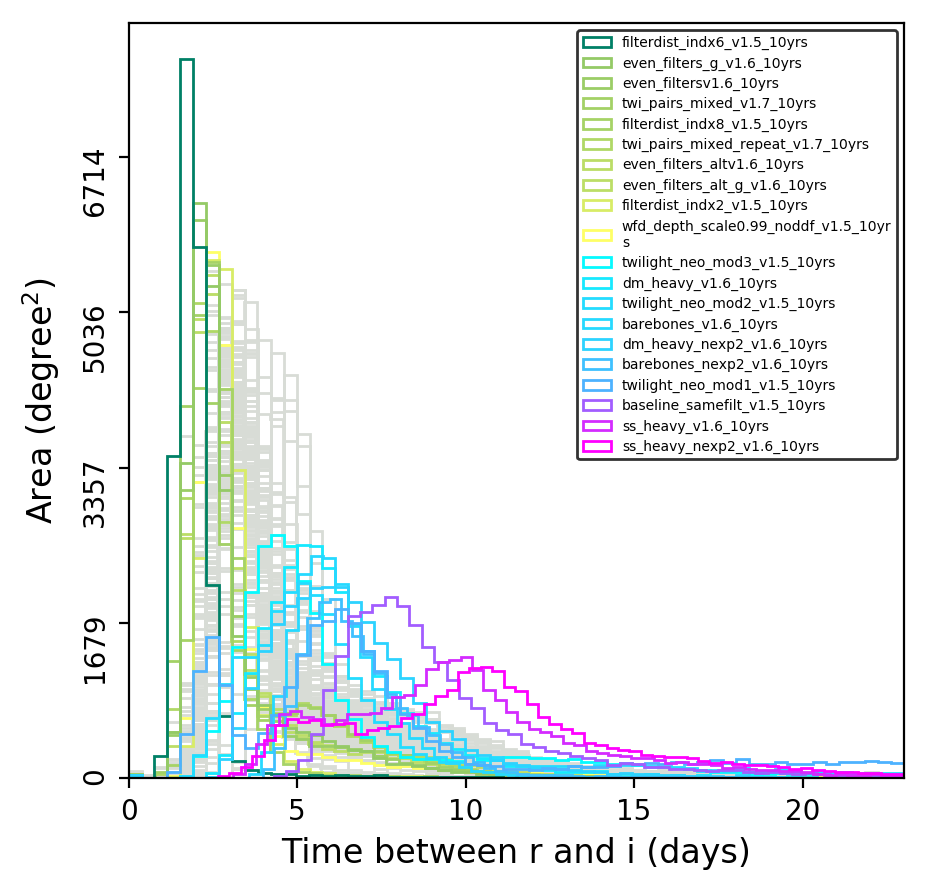

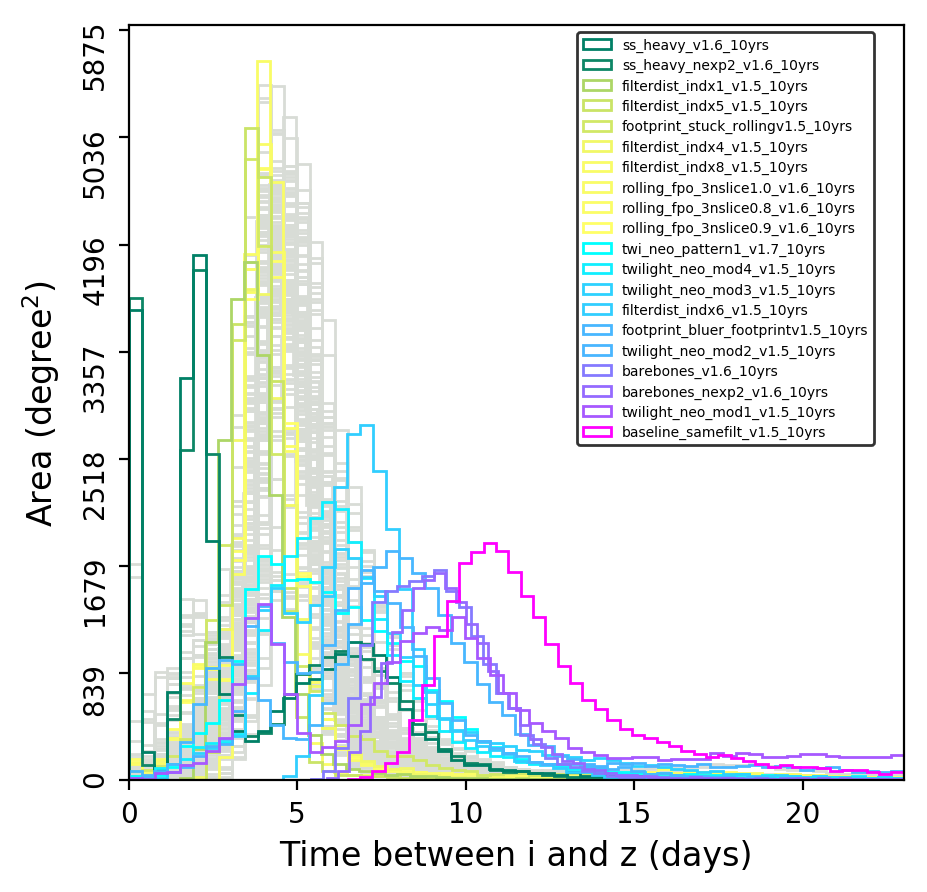

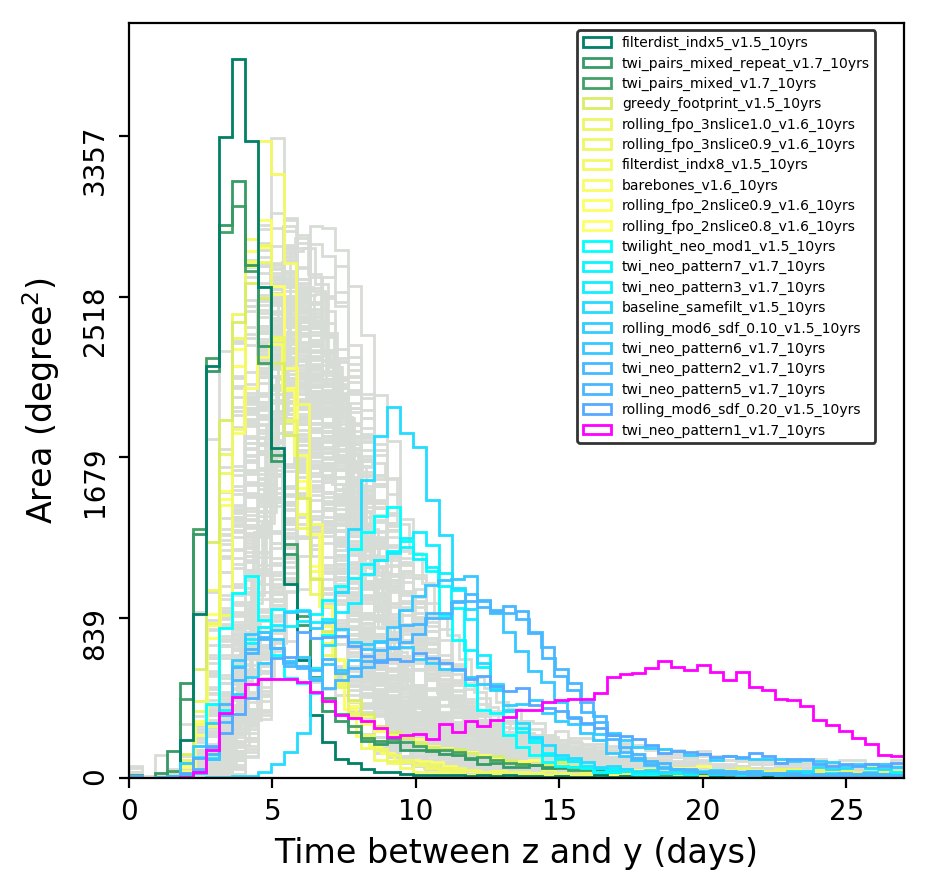

In [15]:
data_func = None
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

xmin = {"ug": 0, "gr": 0, "ri": 0, "iz": 0, "zy": 0}
xmax = {"ug":23, "gr":10, "ri":23, "iz":23, "zy":27}

ymax = {"ug": 9000., "gr": 9000., "ri":None, "iz":None, "zy":None}

for Key in sorted_Keys:
    print(Key)
    filter1 = Key[1][-3]
    filter2 = Key[1][-1]
    xlabel = "Time between {0} and {1} (days)".format(filter1,filter2)
    
    datamin = xmin["{0}{1}".format(filter1,filter2)]
    datamax = xmax["{0}{1}".format(filter1,filter2)]
    
    plot_OpSims_hist_extremes(Key, bundleDicts, data_func=data_func, figsize=(5,5), 
                              healpix_pixarea=healpix_pixarea, datamin=datamin,
                              datamax=datamax, xlabel=xlabel, 
                              color_map_bottom=mpl.cm.summer, color_map_top=mpl.cm.cool, 
                              percentile=5.0, ymax_use=ymax[filter1+filter2],
                              legend_box_in_plot=True, bbox_x = 0.57, bbox_y = 1.00)
    
    fname = "{0}/mean_time_{1}{2}.png".format(plots_folder, filter1, filter2)
    plt.savefig(fname, dpi=200, bbox_inches='tight')    